In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from random import randrange

In [226]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

data = pd.read_csv("../Data-tests/KaDo.csv")
df = data.copy()
# small_df = data.copy()[:500]
# small_df.head()

In [227]:
to_drop = ['MOIS_VENTE', 'PRIX_NET', 'UNIVERS', 'CLI_ID']
df.drop(to_drop, inplace=True, axis=1)

In [228]:
df.astype({"TICKET_ID": object})
df.head()

TICKET_ID          FAMILLE                MAILLE  \
0   35592159          HYGIENE               HYG_JDM   
1   35592159          HYGIENE               HYG_JDM   
2   35592159  SOINS DU VISAGE    VIS_JEUNE_ET_LEVRE   
3   35592159  SOINS DU VISAGE  VIS_AAAR_DEMAQLOTION   
4   35592159          HYGIENE               HYG_JDM   

                           LIBELLE  
0    GD JDM4 PAMPLEMOUSSE FL 200ML  
1    GD JDM4 PAMPLEMOUSSE FL 200ML  
2  CR JR PARF BIO.SPE AC.SENT.50ML  
3    EAU MICELLAIRE 3 THES FL200ML  
4           GD JDM4 TIARE FL 200ML

In [229]:
df_save = df.copy()

In [230]:
df = df_save.copy()

In [231]:
index = randrange(df.shape[0])
index

6972793

In [232]:
libelle = df['LIBELLE'].values[index]
libelle

'GD AGRUMES FP FL 200 ML'

In [233]:
df_cart = df.copy()
df_cart = df_cart.query("LIBELLE == '" + libelle + "'")
df_cart.head()

TICKET_ID  FAMILLE        MAILLE                  LIBELLE
17     33534570  HYGIENE  HYG_PARFUMEE  GD AGRUMES FP FL 200 ML
30     32983494  HYGIENE  HYG_PARFUMEE  GD AGRUMES FP FL 200 ML
31     32983494  HYGIENE  HYG_PARFUMEE  GD AGRUMES FP FL 200 ML
49     34773724  HYGIENE  HYG_PARFUMEE  GD AGRUMES FP FL 200 ML
1148   35985737  HYGIENE  HYG_PARFUMEE  GD AGRUMES FP FL 200 ML

In [234]:
df_all_cart = df.loc[df['TICKET_ID'].isin(df_cart['TICKET_ID'])]
df_all_cart = df_all_cart.query("LIBELLE != '" + libelle + "'")
df_all_cart.head()

TICKET_ID          FAMILLE                       MAILLE  \
18   33534570      CAPILLAIRES             CAPILLAIRE_AUTRE   
19   33534570       MAQUILLAGE                   MAQ_ONGLES   
29   32983494   SOINS DU CORPS  CORPS_HYDRA_NOURRI_ET_SOINS   
32   32983494  SOINS DU VISAGE           VIS_JEUNE_ET_LEVRE   
47   34773724  SOINS DU VISAGE                      VIS_BIO   

                                   LIBELLE  
18  LISSAGE AP SHAMPOING LISSANT 150ML SVC  
19            VAO CERISE NOIRE 32 LUM4 3ML  
29            SVC PIEDS SOS P ECHAUF T50ML  
32           MSQ CRANBERRY BTE CROQUER T50  
47          BIO NUTR VISAGE CULT BIO2 50ML

In [235]:
serie_libelle_count = df_all_cart["LIBELLE"].value_counts()
serie_libelle_count.head()

LAIT AGRUMES FP FL200ML                     2043
EDT UN MATIN AU JARD 100ML FL. D'AGRUMES    1788
UMAJ GD CERISIERS FL200ML                   1347
UMAJ GD MUGUET FL 200ML                     1260
GD ROSE FP FL200ML                          1212
Name: LIBELLE, dtype: int64

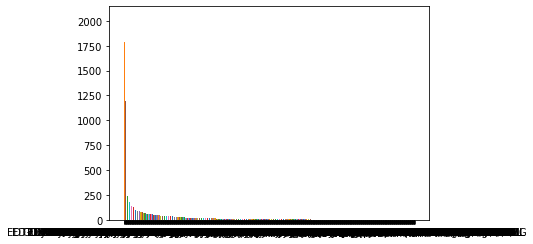

In [236]:
for idx, val in zip(serie_libelle_count.index, serie_libelle_count.values):
    plt.bar(idx, val)

In [256]:
df_count_all = df_all_cart.copy()
df_count_all.drop(["TICKET_ID"], inplace=True, axis=1)
df_count_all = df_count_all.drop_duplicates()
df_count_all["COUNT"] = df_count_all['LIBELLE'].map(serie_libelle_count)
df_count_all = df_count_all.nlargest(50, 'COUNT')
df_count_all.head()

FAMILLE                 MAILLE  \
11219  SOINS DU CORPS  CORPS_HYDR_LAIT_HUILE   
2290        PARFUMAGE            PARF_PARFUM   
8322          HYGIENE           HYG_PARFUMEE   
3212          HYGIENE           HYG_PARFUMEE   
6947          HYGIENE           HYG_PARFUMEE   

                                        LIBELLE  COUNT  
11219                   LAIT AGRUMES FP FL200ML   2043  
2290   EDT UN MATIN AU JARD 100ML FL. D'AGRUMES   1788  
8322                  UMAJ GD CERISIERS FL200ML   1347  
3212                    UMAJ GD MUGUET FL 200ML   1260  
6947                         GD ROSE FP FL200ML   1212

In [243]:
df_all_cart.shape

(28610, 4)

In [257]:
df_count_all.shape

(50, 4)

In [258]:
df_count_all = df_count_all.sort_values(by=['COUNT'], ascending=False)
df_count_all.head()

FAMILLE                 MAILLE  \
11219  SOINS DU CORPS  CORPS_HYDR_LAIT_HUILE   
2290        PARFUMAGE            PARF_PARFUM   
8322          HYGIENE           HYG_PARFUMEE   
3212          HYGIENE           HYG_PARFUMEE   
6947          HYGIENE           HYG_PARFUMEE   

                                        LIBELLE  COUNT  
11219                   LAIT AGRUMES FP FL200ML   2043  
2290   EDT UN MATIN AU JARD 100ML FL. D'AGRUMES   1788  
8322                  UMAJ GD CERISIERS FL200ML   1347  
3212                    UMAJ GD MUGUET FL 200ML   1260  
6947                         GD ROSE FP FL200ML   1212

<AxesSubplot:xlabel='LIBELLE'>

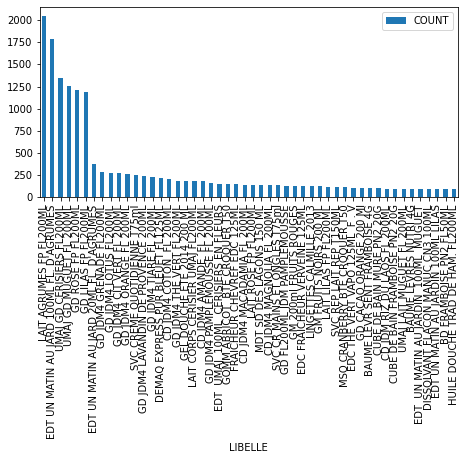

In [277]:
df_count_all.plot.bar(x="LIBELLE", y="COUNT")

<AxesSubplot:xlabel='LIBELLE', ylabel='COUNT'>

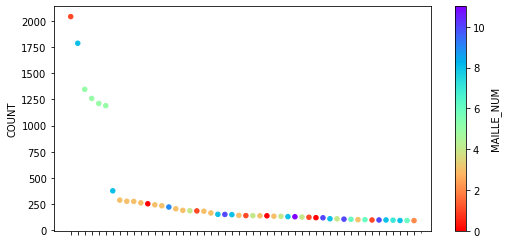

In [276]:
df_count_by_maille = df_count_all.copy()

color_map = pplt.get_cmap('rainbow') 
reversed_color_map = color_map.reversed()
encoder = LabelEncoder()
df_count_by_maille['MAILLE_NUM'] = encoder.fit_transform(df_count_by_maille['MAILLE'])
df_count_by_maille.plot.scatter(x="LIBELLE", y="COUNT", c="MAILLE_NUM", colormap=reversed_color_map)


<AxesSubplot:xlabel='LIBELLE', ylabel='COUNT'>

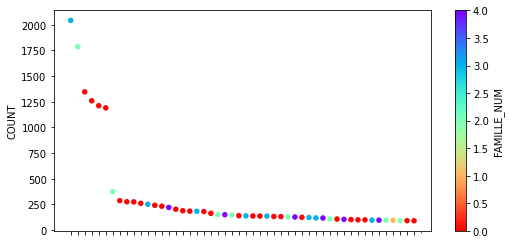

In [278]:
df_count_by_famille = df_count_all.copy()

color_map = pplt.get_cmap('rainbow') 
reversed_color_map = color_map.reversed()
encoder = LabelEncoder()
df_count_by_famille['FAMILLE_NUM'] = encoder.fit_transform(df_count_by_famille['FAMILLE'])
df_count_by_famille.plot.scatter(x="LIBELLE", y="COUNT", c="FAMILLE_NUM", colormap=reversed_color_map)

<AxesSubplot:xlabel='LIBELLE', ylabel='COUNT'>

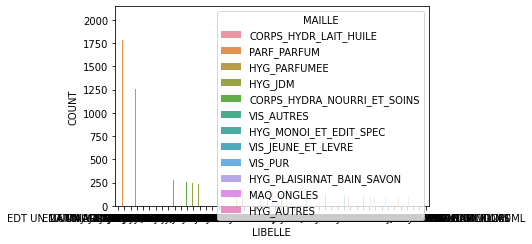

In [283]:
sns.barplot(x="LIBELLE", y="COUNT", hue="MAILLE", data=df_count_by_maille)

<AxesSubplot:xlabel='LIBELLE', ylabel='COUNT'>

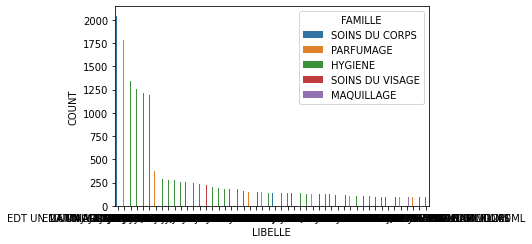

In [282]:
sns.barplot(x="LIBELLE", y="COUNT", hue="FAMILLE", data=df_count_by_maille)

In [260]:
len(df_count_all["MAILLE"].unique())

12

In [261]:
serie_maille_count = df_count_all.groupby(['MAILLE'])['LIBELLE'].count()
serie_maille_count.sort_values(ascending=False).head()

MAILLE
HYG_JDM                   14
PARF_PARFUM                8
CORPS_HYDR_LAIT_HUILE      5
HYG_MONOI_ET_EDIT_SPEC     5
HYG_PARFUMEE               4
Name: LIBELLE, dtype: int64

In [262]:
pd.DataFrame(serie_maille_count)

LIBELLE
MAILLE                              
CORPS_HYDRA_NOURRI_ET_SOINS        3
CORPS_HYDR_LAIT_HUILE              5
HYG_AUTRES                         1
HYG_JDM                           14
HYG_MONOI_ET_EDIT_SPEC             5
HYG_PARFUMEE                       4
HYG_PLAISIRNAT_BAIN_SAVON          3
MAQ_ONGLES                         1
PARF_PARFUM                        8
VIS_AUTRES                         1
VIS_JEUNE_ET_LEVRE                 4
VIS_PUR                            1

In [264]:
# quantile = serie_maille_count.quantile(.75)
# df_count_maille = df_count_all.copy()
# df_count_maille.drop(['FAMILLE', 'COUNT', 'LIBELLE', 'TICKET_ID'], inplace=True, axis=1)
# # df_count_all.head()
# df_count_maille["COUNT_MAILLE"] = df_count_maille['MAILLE'].map(serie_maille_count)
# # df_count_maille = df_count_maille.query("COUNT_MAILLE > " + str(quantile))
# df_count_maille.sort_values(by=['COUNT_MAILLE'], ascending=False).head()

<function matplotlib.pyplot.show(close=None, block=None)>

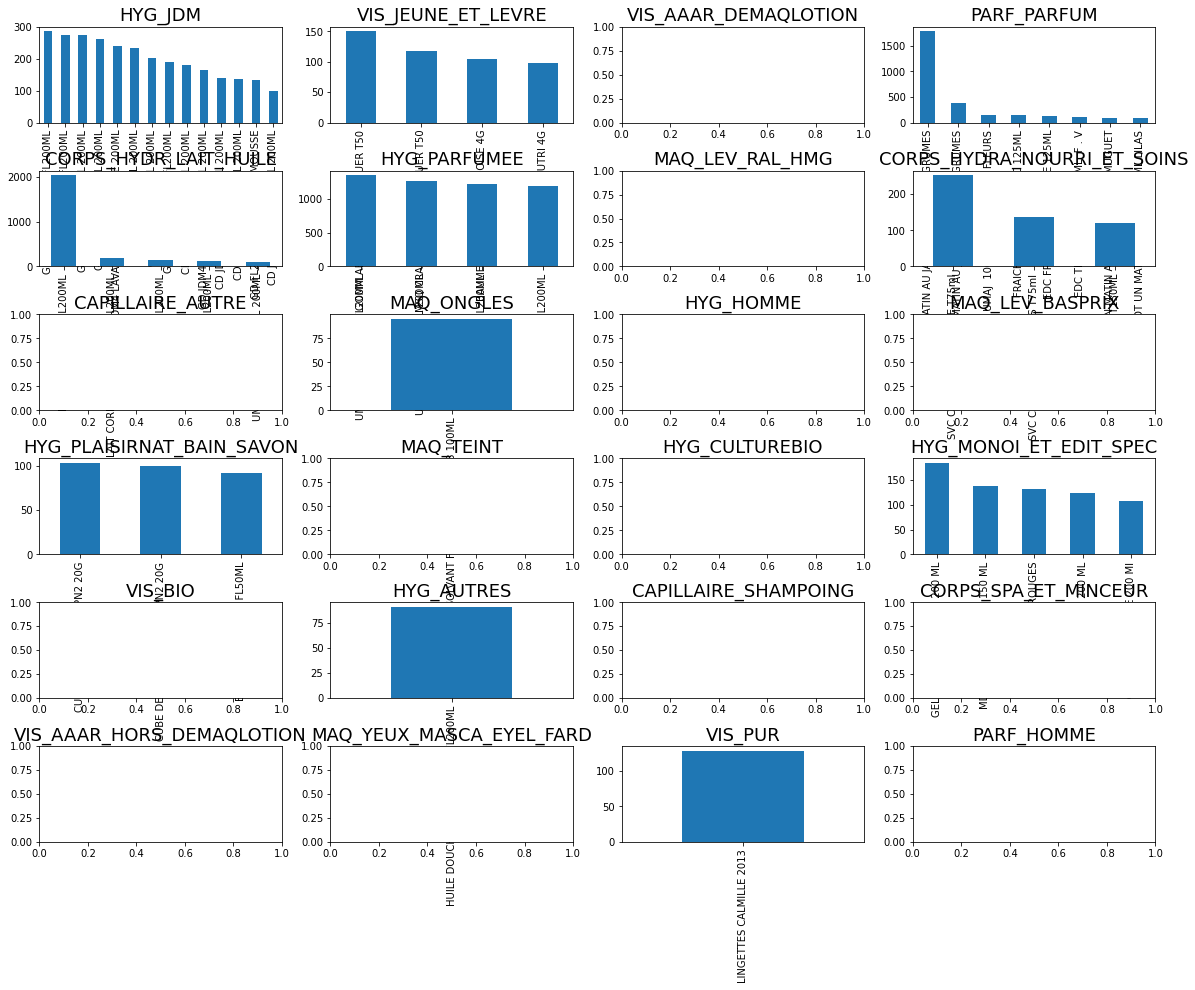

In [265]:
mailles = df["MAILLE"].unique()
length = len(mailles)
data_list = []
nrow=6
ncol=4
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))
pplt.x_label = "test"

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(mailles[i], fontsize=18) # 3

count = 0
for r in range(nrow):
    for c in range(ncol):
        df_maille = df_count_all.query("MAILLE == '" + mailles[count] + "'") 
        if (df_maille.shape[0]) :
            df_maille.plot.bar(x="LIBELLE", y="COUNT", ax=axes[r,c], legend=False, xlabel="")
        count += 1

pplt.show

In [266]:
len(df_count_all["FAMILLE"].unique())

5

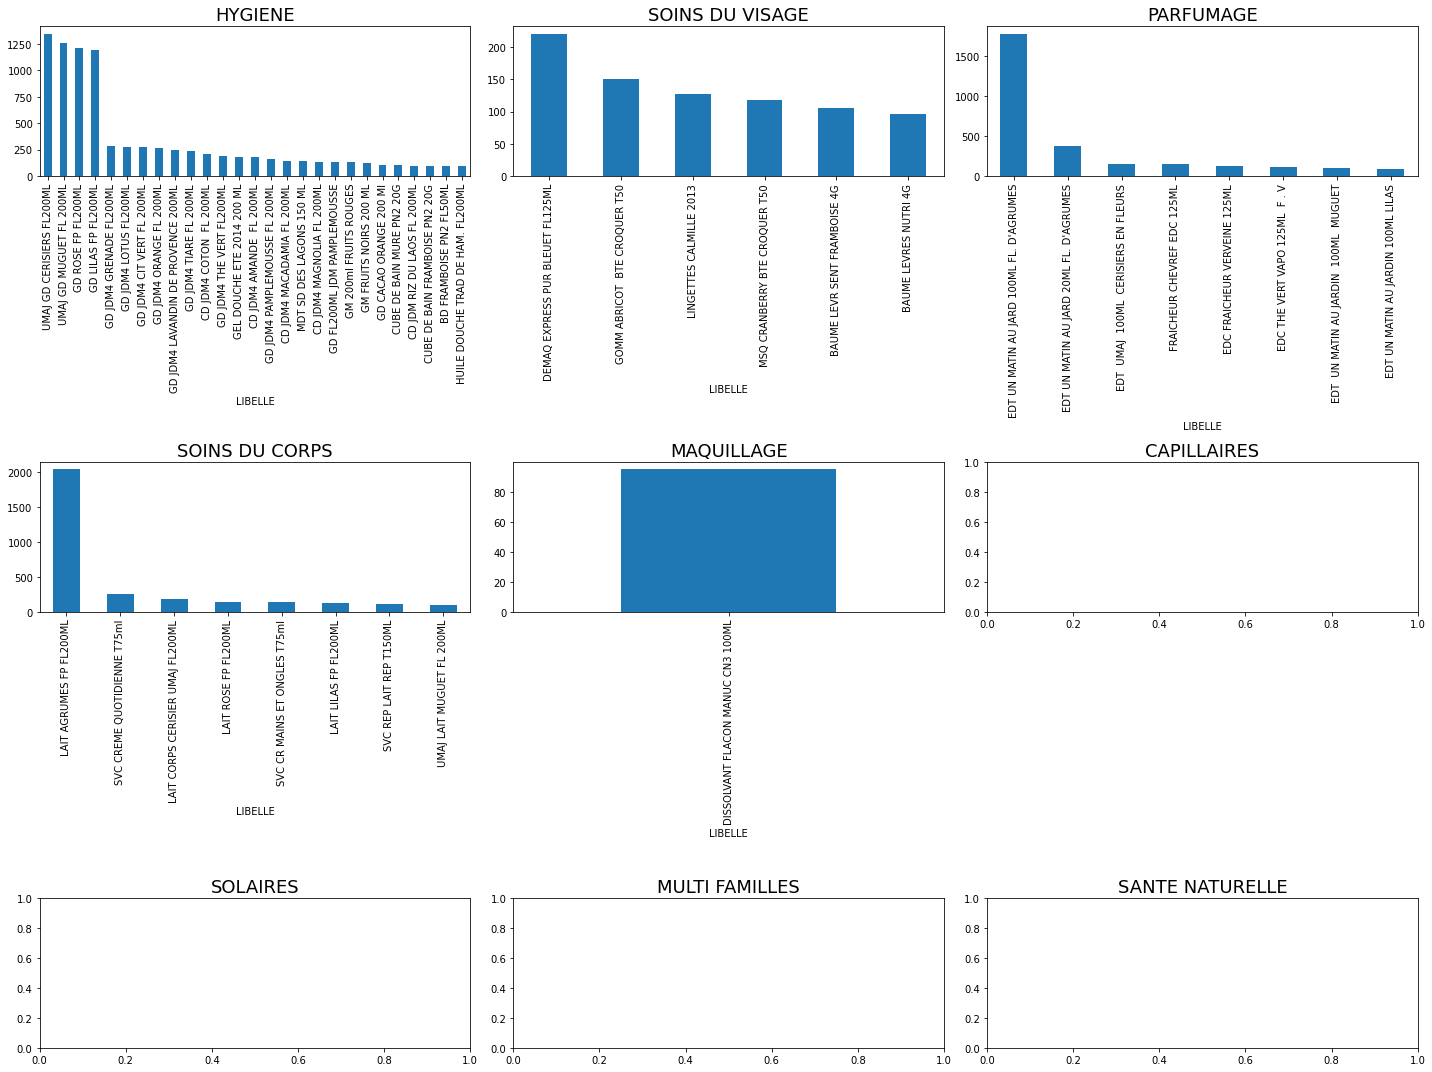

In [267]:
familles = df["FAMILLE"].unique()
length = len(familles)
data_list = []
nrow=3
ncol=3
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(familles[i], fontsize=18) # 3

count = 0
for r in range(nrow):
    for c in range(ncol):
        df_famille = df_count_all.query("FAMILLE == '" + familles[count] + "'")        
        if (df_famille.shape[0]) :
            df_famille.plot.bar(x="LIBELLE", y="COUNT", ax=axes[r,c], legend=False)
        count += 1